# Pytorch Workflow
* Data (prepare and load)
* Build model 
* Fitting the model to data (training)
* Making predictions and exaluating the model (inference)
* Saving and loading the model
* Putting it all together

In [5]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Checking torch version
torch.__version__

'2.1.1+cu121'

## Data (Preparing and Loading)
Data can be almost anything in machine learning from excel spreadsheets to videox, audio, DNA, Text, Images

Machine Learning has mainly two parts
1. Get data into numerical representation.
2. Build a model to learn patterns in that numerical representation.

Next we will create some known data using linear regression formula.
We will use a linear regression formula to make a straight line with *known* **parameters**

A linear regression line has an equation of the form:
 
#### Y = a +bX

 we will modify the equation a little bit and replace the a with the term **Bias** and the b with the term **Weights**.
 These are the typical names of the parameters in Deep Learning.

In [6]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create 
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)

y = weight*X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [6]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets
Let's create a training and test set with our data.

In [7]:
# Create a train/test split, there are a few different ways for this.
# Since our data is simple therefore we are using a rather simple method to split.
# A common method is by using the Scikit-Learn's Train Test split.

# import torch
# import matplotlib.pyplot as plt

train_split = int(0.8*len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [8]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [9]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    
    """
    Plots training Data, test Data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in Blue
    plt.scatter(train_data, train_labels,
                 color = "blue",
                 s = 4,
                 label="Training Data")
    
    # Plot test data in Green
    plt.scatter(test_data, test_labels,
                 color = "green",
                 s = 4,
                 label="Test Data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label='Predictions')
    
    plt.legend(prop={"size":14})

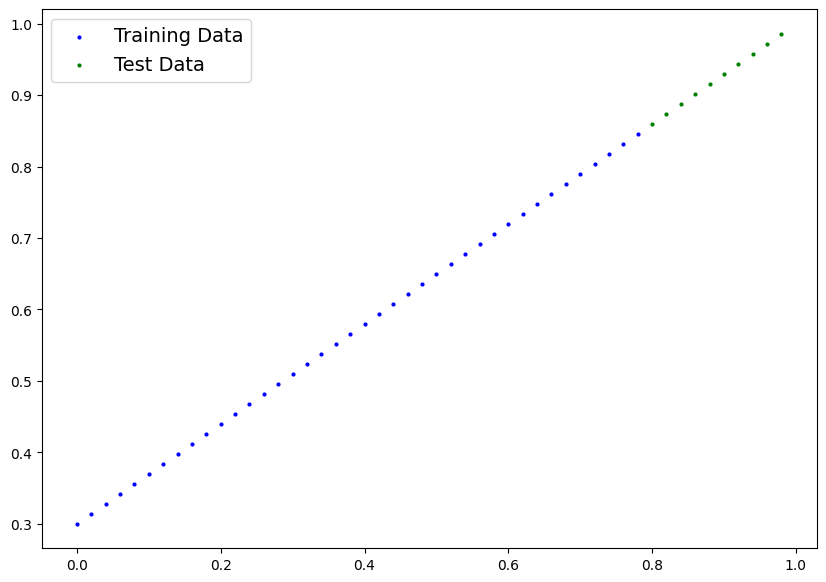

In [10]:
plot_predictions()

## Building aLinear Regression Model from Scratch
We will create a Linear Regression model class.

In [11]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [16]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- Almost everything in Pytorch inherits from the nn.Module
    def __init__(self):
        super().__init__()

        # Initialize Model Parameters
        self.weights = nn.Parameter(torch.rand(1, # <- start with a random weight and then try to adjust it to the ideal weight.
            requires_grad=True, # <- can this parameter be updated via the Gradient Descent method?
            dtype=torch.float # <- This the default data type in PyTorch, Pytorch loves this data type.
        ))
        
        self.bias = nn.Parameter(torch.rand(1, # <- start with a random bias and then try to adjust it to the ideal weight.
            requires_grad=True, # <- can this parameter be updated via the Gradient Descent method?
            dtype=torch.float # <- This the default data type in PyTorch, Pytorch loves this data type.
        ))
    
    # Forward method to define the computation
    def forward(self, x:torch.Tensor) -> torch.Tensor: # <- x is the input data.
        return self.weights * x + self.bias # This is the linear regression formula

### PyTorch model building essentials

* torch.nn - contains all the building blocks for computational graphs ( a neural network can be considered a computational graph).
* torch.nn.Parameter - what parameters should our model try and learn, ofthe a PyTorch layer from torch.nn will set this for us.
* torch.nn.Module - the base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim -  this is where all the optimizers in PyTorch live, they will help with gradient descent.
* def forward( - All nn.Module subclasses require you to override forward(), thsi method defines what happens in the forward computation.

### Checking the contents of out PyTorch model

Now we've created a model, lets see whats going on inside

So we can check our model parameters or whats inside our model using .parameters()

In [19]:
# Create a random seed
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)

# Create an instance of the model that we have created (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters of the model
model_0.parameters()


<generator object Module.parameters at 0x7fc0f416cc10>

In [20]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [23]:
# List all the parameters
model_0.state_dict(), weight, bias

(OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))]),
 0.7,
 0.3)

### Making predictions using "torch.inference_mode()"

* To check our models predictive power, we essentially mean how well it predicts y_test based on x_test.
* When we pass data through our model, its going to run it through the forward() method.

In [26]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [31]:
# Make predictions with model
# The word "Inference" is used interchangeably with the making predictions.

# with torch.no_grad():    # torch.no_grad is another alternative to using torch.inference_mode(), but it is older and slower.
#     y_preds = model_0(X_test)

with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds, y_test

(tensor([[1.6208],
         [1.6385],
         [1.6561],
         [1.6738],
         [1.6914],
         [1.7090],
         [1.7267],
         [1.7443],
         [1.7620],
         [1.7796]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

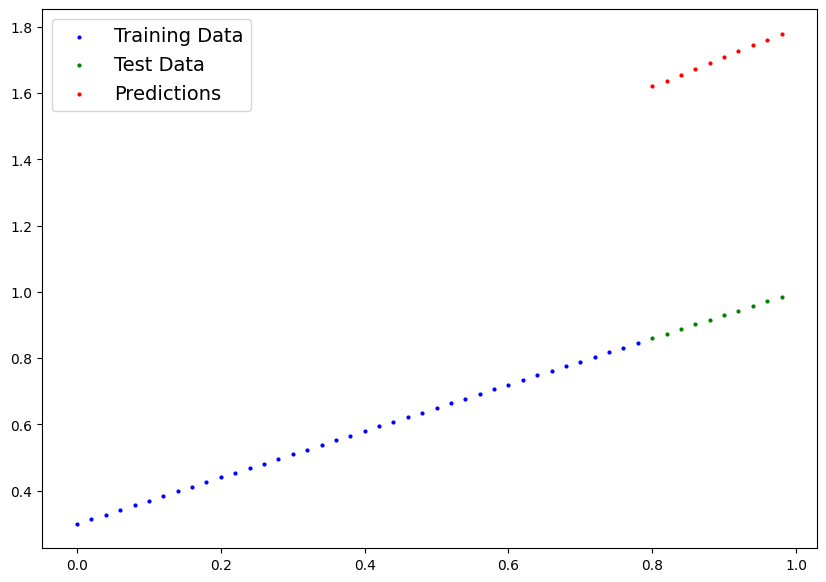

In [30]:
plot_predictions(predictions=y_preds)

### Train Model
unknown parameters (Random Variable) -> *known* parameters
Or in other words, from a poor representation of data to a better representation.

One way to measure how poor or how wrong your models predictions are is to use a loss function.
* Note: Loss function may also be called cost function or criterion in different areas. for our case, we're going to refer to it as loss function.

#### Things we need to train:

* **Loss function:** A function to measure how wrong your models predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss or a model and adjusts the models parameters (e.g. weight and bias) to improve the loss function.

And specifically for PyTorch, we need:
* A training loop
* A testing loop



In [32]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [33]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [36]:
# Setup a loss function

# nn.L1Loss is the Mean Absolute Error(MAE), also known as L1 loss function.
# MAE_loss = torch.mean(torch.abs(y_preds, y_test))
# Or more simply
# MAE_loss = torch.nn.L1loss()

loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(
        params=model_0.parameters(),
        lr=0.01
    ) # lr = learning rate, an important hyper-parameter that you can set.
# The smaller the learning rate, the smaller the change in parameters, and vice versa

### Building a training (and a testing) loop in PyTorch

A couple of things we need in a training loop:

0. Loop through the data
1. Forward Pass (involves data moving through our model's `forward()` functions.) - also called forward propagation.
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move  backward through the network to calculate the gradients of each of the parameters of our mode with respect to the loss. (**back propagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [37]:
# An epoch is one loop through the data... 
# (this is a hyperparameter)
epochs = 1 

# Training
# 0. loop through the data...

for epoch in range(epochs):
    # Set the model to traing mode
    model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients.

    # 1. Forward Pass
    y_pred = model_0(X_train)

    # 2. Calculate Loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backward pass on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step() # by default how the optimizer changes will accumulate through the loop so we need to zero them above in step 3.

    # model_0.eval() # eval mode in PyTorch turns off gradient tracking
    